# Analysis
In this notebook we will talk about our findings from this project, include various animations of both 2d and 3d birds flocking and plots of how the Vicsek Order Parameter and convergence of this overdamped system is affected by varying the parameters. 

To code the Vicsek Model we opted to use a Object Orientated Programming paradigm, as proposed by Ben. By creating different objects, we were able to group useful functions together which improves readability and efficiency in the code. With the main benefit of this coding style being the ability to split the workload by methods. 

To wrap the frame we used a method suggested by Dr Silke. By tiling the birds positions together we create a 3d array, tiling it twice horizontally and vertically. By subtracting the two 3d arrays we create an array of the pairwise vectors between each bird. This function is not unsimilar to the built in scipy.special.distance() with the difference being that the array we create is non normalised. From this point we can then calculate if each component of each vector is bigger than (L/2), where L is the frame size. If this is true we then recalculate the component now being itself mod the frame size.

In [2]:
from flock import *

## 2D Birds
We generated 200 birds distributed uniformly in $\mathbb{R}^2$ with thetas distributed unifomly $0$ to $2\pi$. Their positions were updated according to the Vicsek Model.

In [3]:
##Generate a flock of 200 birds, speed 0.5, frame size 15 radii
f = Flock(200,0.5,15)
##Create an animated quiver plot of birds moving for different sigma
## TODO sort out reset 
# anim_02 =f.animate_movement(1,40,200,0.2)
# f.reset()
# anim_04 =f.animate_movement(1,40,200,0.4)
# f.reset()
# anim_06 =f.animate_movement(1,40,200,0.6)
# f.reset()
# anim_08 =f.animate_movement(1,40,200,0.8)
# f.reset()

In [ ]:
HTML(anim_04.to_jshtml())

In [ ]:
HTML(anim_06.to_jshtml())

In [ ]:
HTML(anim_08.to_jshtml())

## Vicsek Order Paramater 
Below we plot the Vicsek Order Parameter and consider the implications for the model in terms of phase transitions yada yada

In [ ]:
#creates a flock of 200 birds, speed 0.5 in a box 15 times their radius view
def plot_order_stat(sigma,B=10,T=200):
    f = Flock(200,0.5,15)
    ts = np.zeros((B,T))
    vops =np.zeros((B,T))
    for i in range(B):
        ts[i],vops[i] = f.plot_order_stat(1,T,sigma,display=False,plot=False)
        f.reset()
    fig,(ax1,ax2) = plt.subplots(1,2)
    ax1.plot(ts[0],vops.transpose())
    ax1.set_ylabel('Order Statistic')
    ax1.set_xlabel('Time Steps')
    ax1.set_title(f'Order statistic plot (10 samples) for sigma = {sigma}',fontsize=7)
    ax2.plot(ts[0],np.mean(vops.transpose(),axis=1))
    yerr = np.std(vops.transpose(),axis=1)
    ax2.errorbar(ts[0],np.mean(vops.transpose(),axis=1),
            xerr=0,
            yerr=yerr,
            errorevery=20,
            ecolor = 'r')
    ax2.set_ylabel('Order Statistic',fontsize = 10)
    ax2.set_xlabel('Time Steps')
    ax2.set_title(f'Order statistic plot with error bars for sigma = {sigma}',fontsize=7)
 
 

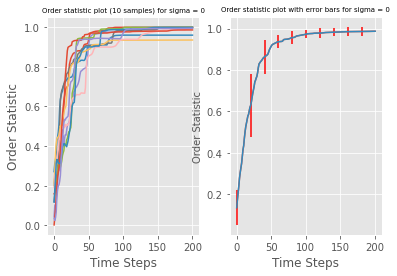

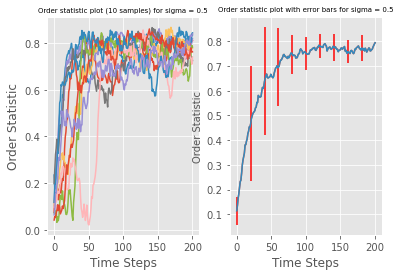

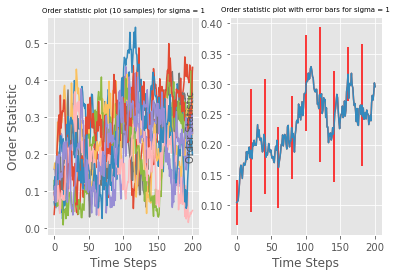

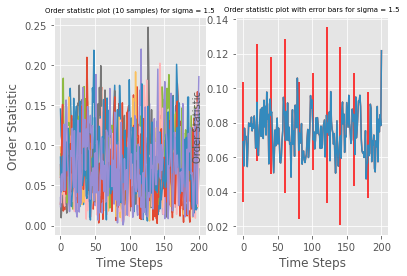

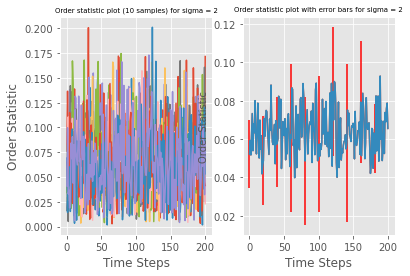

In [94]:

plot_order_stat(0)
plot_order_stat(0.5)
plot_order_stat(1)
plot_order_stat(1.5)
plot_order_stat(2)

## $n(\sigma)$ Phase Transition Plot
The code below was used to generate 10 samples of 1000 steps for each noise, the first 200 steps were removed and the average order statistic was calulated. We then filled out a Pandas dataframe and saved as a csv for plotting.

In [10]:
# nrun = 20
# nsig = 20
# data = np.zeros((nrun,nsig))
# for i in range(nrun):
#     print(f'completed run {i}')
#     for j in range(nsig):
#         f.reset()
#         ts,vops=f.plot_order_stat(1,1000,j*0.1,display=False,plot=False)
#         data[i,j] = np.mean(vops[200:])
# print(data)        


In [11]:
# colname = np.array(np.round(np.linspace(0,1.9,20), decimals = 1),dtype= str)
# print(colname)
# # df = pd.DataFrame(data, columns = colname)
# # f = open('data.csv',"w+")
# # f.write(df.to_csv(index = True))
# # f.close()




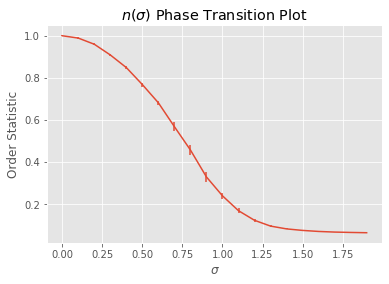

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/bennm37/vicsek-model-group3/animate_vicsek_birds/data.csv')
df
datmean = np.array(df.mean())
datst = np.array(df.std())
x = np.linspace(0,1.9,20)
y = datmean
yerr = datst

fig, ax = plt.subplots()

ax.errorbar(x, y,
            xerr=0,
            yerr=yerr)
ax.set_xlabel('$\sigma$')
ax.set_ylabel('Order Statistic')
ax.set_title('$n(\sigma)$ Phase Transition Plot')


plt.show()




From plotting the $n(\theta)$ phase transition diagram we can infer characteristics about flocking in the Vicsek model. We can see that when noise is low, we observe the most flocking as the order statistic is highest, conversely when we have very little flocking when noise exceeds 1.25. The plot plateaus in both ends with a linear looking mid-section. In the tails of our plot we have very small error bars meaning the average order statistic of the flock is more consistent hence when our noise takes an extreme value the flock will almost surely end up either flocked or not at all.

## 3D Birds 
By adapting the Flock class we have created 3d birds. To initate their directions we considered projecting uniformly random points on a cylinder onto a sphere to get an even distribution of points unbiased about the poles. Positions were uniformly random in $\mathbb{R}^3$. To update directions we used noise normally distributed in phi and theta and then scaled accordingly to be unbiased to the poles. Here 6 radii are used instead of 15, as a paper(cite) suggested an important parameter was the ratio of the number of birds to the volume of the frame in radii. 

In [ ]:

# f_3d = Flock_3d(200,0.5,6)
# anim = f_3d.animate_movement(1,200)
HTML(anim.to_jshtml())